# <center>Rozwiązywanie układów równań</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [11]:
import main
import scipy as sp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%load_ext memory_profiler

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, z rzadkimi macierzami prostokątnymi. Czyli dana jest macierz $\mathbf{A}$ prostokątna o wymiarach ($m\times n$) i [rzadka](https://pl.wikipedia.org/wiki/Macierz_rzadka) oraz wektor $\mathbf{b}$ ($m\times 1$), należy rozwiązać układ równań postaci:    
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ to macierz współczynników z lewej strony równania, wektor $\mathbf{x}$ jest wektorem zmiennych a wektor $\mathbf{b}$ wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
Dane jest $m = 50$ oraz $n = 12$. Zdefiniuję funkcję *spare_matrixAbt*, która zwróci:
- wektor $\mathbf{t}$ typu $m\times 1$ za pomocą komendy linspace tak aby wartości tego wektora należay do przedzaiłu $[0,1]$,
- wektor $\mathbf{b}$ typu $m \times 1$, którego wartości dane są funkcją $\cos(4t)$ oraz
- macierz $\mathbf{A}$ postaci: 
$$
\left[\begin{matrix}
1 & t_0 & t_{0}^{2} & \cdots & t_{0}^{n-1} \\
1 & t_1 & t_{1}^{2} & \cdots & t_{1}^{n-1} \\
1 & t_2 & t_{2}^{2} & \cdots & t_{2}^{n-1} \\
\vdots & \cdots & \ddots & \cdots & \vdots \\
1 & t_{m-1} & t_{m-1}^{2} & \cdots & t_{m-1}^{n-1} 
\end{matrix}\right]
$$  
  
**Wskazówka**: Do definicji macierzy $\mathbf{A}$ należy użyć funkcji [vander](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.vander.html) oraz [fliplr](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.fliplr.html).  
 
  
Rozwiąż układ równań $\mathbf{Ax}=\mathbf{b}$ postaci:
$$
\left[\begin{matrix}
1 & t_0 & t_{0}^{2} & \cdots & t_{0}^{n-1} \\
1 & t_1 & t_{1}^{2} & \cdots & t_{1}^{n-1} \\
1 & t_2 & t_{2}^{2} & \cdots & t_{2}^{n-1} \\
\vdots & \cdots & \ddots & \cdots & \vdots \\
1 & t_{m-1} & t_{m-1}^{2} & \cdots & t_{m-1}^{n-1} 
\end{matrix}\right]
\left[\begin{matrix}
x_0\\
x_1\\
x_2\\
\vdots\\
x_{n-1}
\end{matrix}\right] =
\left[\begin{matrix}
b_0\\
b_1\\
b_2\\
\vdots\\
b_{m-1}
\end{matrix}\right]
$$ 
za pomocą następujacych metod:

1. Przekształcenia układu równań do postaci: $\mathbf{A}^{\mathrm{T}}\mathbf{Ax}=\mathbf{A}^{\mathrm{T}}\mathbf{b}$ (zdefinuj funkcję *square_from_rectan* która przekształci odpowiednio macierz A i wektor b)  i stosując funkcję solve, z poprzednich zajęć.
2. Domyślnej metody Pythona rozwiązywania układów równań z macierzą prostokątną [lstsq](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.lstsq.html#numpy-linalg-lstsq).  
3. Rozkładu QR rozwiązywania układów równań podanego na wykładzie. Do dokonania rozkładu QR w Pythonie używa się funkcji [qr](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.qr.html), natomiast do rozwiązywania układu równań z macierzą trójkątną służy funkcja [solve_triangular](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html)
4. Metody rozkładu SVD rozwiązywania układów równań podanego na wykładzie.
5. Porównaj czasy wykonania wszystkich metod oraz zużycie pamięci.
6. Porównaj jakość otrzymanych wyników

In [57]:
# Zadanie 1 - macierz
m, n = 50, 12
A, b = main.spare_matrix_Abt(50, 12)
print("Macierz z zadanego m: {} i n: {} = \n{}\n \nWektor: \n{}\n".format(m, n, A, b))

# Ad. 1
print("PIERWSZA METODA\n")

A_square, b_square = main.square_from_rectan(A, b)
print("Macierz po przekształceniu: \n{}\n \nWektor po przekształceniu: \n{}\n".format(A_square, b_square))

solution_1 = np.linalg.solve(A_square, b_square)
print("Rozwiązanie równania z zastosowaniem metody linalg.solve: {}\n".format(solution_1))

norm_1 = main.residual_norm(A_square, solution_1, b_square)
print("Norma przekształconej macierzy: {}\n".format(norm_1))

print("Zużycie pamięci: ")
%memit solution_1
print("\nCzas wykonania: ")
%timeit -r 5 -n 10 -o solution_1

# Ad. 2
print("\nDRUGA METODA\n")

solution_2, norm_2, temp1, temp2 = np.linalg.lstsq(A,b)

print("Rozwiązanie równania z zastosowaniem metody linalg.lstsq: {}\n".format(solution_2))
print("Norma macierzy z zastosowaniem metody linalg.lstsq: {}\n".format(norm_2))

print("Zużycie pamięci: ")
%memit np.linalg.lstsq(A,b)
print("\nCzas wykonania: ")
%timeit -r 5 -n 10 -o np.linalg.lstsq(A,b)

# Ad. 3
print("\nTRZECIA METODA\n")

A_Q, b_R = np.linalg.qr(A)
A_Qt = np.transpose(A_Q)
b_3 = A_Qt @ b

solution_3 = sp.linalg.solve_triangular(b_R, b_3)
print("Rozwiązanie równania z zastosowaniem metody QR: {}\n".format(solution_3))

norm_3 = main.residual_norm(b_R, solution_3, b_3)
print("Norma macierzy z zastosowaniem metody QR: {}\n".format(norm_3))

print("Zużycie pamięci: ")
%memit sp.linalg.solve_triangular(b_R, b_3)
print("\nCzas wykonania: ")
%timeit -r 5 -n 10 -o sp.linalg.solve_triangular(b_R, b_3)

# Ad. 4
print("\nCZWARTA METODA\n")

U, S, V = np.linalg.svd(A, full_matrices=False)
s = np.diag(S)

solution_4 = V.T @ np.linalg.solve(s, U.T @ b)
print("Rozwiązanie równania z zastosowaniem metody SVD: {}\n".format(solution_4))

norm_4 = main.residual_norm(A, solution_4, b)
print("Norma macierzy z zastosowaniem metody SVD: {}\n".format(norm_4))

print("Zużycie pamięci: ")
%memit V.T @ np.linalg.solve(s, U.T @ b)
print("\nCzas wykonania: ")
%timeit -r 5 -n 10 -o V.T @ np.linalg.solve(s, U.T @ b)

# Ad. 5
# W kazdej metodzie zawarto testy czasowe i pamieciowe

Macierz z zadanego m: 50 i n: 12 = 
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 2.04081633e-02 4.16493128e-04 8.49985975e-06
  1.73466526e-07 3.54013317e-09 7.22476158e-11 1.47444114e-12
  3.00906355e-14 6.14094602e-16 1.25325429e-17 2.55766182e-19]
 [1.00000000e+00 4.08163265e-02 1.66597251e-03 6.79988780e-05
  2.77546441e-06 1.13284262e-07 4.62384741e-09 1.88728466e-10
  7.70320269e-12 3.14416436e-13 1.28333239e-14 5.23809140e-16]
 [1.00000000e+00 6.12244898e-02 3.74843815e-03 2.29496213e-04
  1.40507886e-05 8.60252361e-07 5.26685119e-08 3.22460277e-09
  1.97424659e-10 1.20872240e-11 7.40034125e-13 4.53082118e-14]
 [1.00000000e+00 8.16326531e-02 6.66389005e-03 5.43991024e-04
  4.44074305e-05 3.62509637e-06 2.95926234e-07 2.41572436e-08
  1.97201989e-09 1.60981215e-10 1.31413237e-11 1.07276112e-12]
 [1.00000000e+00 1.02040816e-

<ipython-input-57-2550b36025cd>:26: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  solution_2, norm_2, temp1, temp2 = np.linalg.lstsq(A,b)
<string>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


<TimeitResult : 12.3 µs ± 1.48 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)>

Ad. 6

Pierwsza metoda zwróciła wynik inny od pozostałych metod, ponieważ macierz A jest 
macierzą osobliwą. Najbardziej korzystny wynik wyszedł przy wykorzystaniu funkcji lstsq 
(wynik osiągnął najmniejszą normę). Wszystkie metody rozwiązywania równań zużyły dokładnie 
tyle samo pamięci. Najszybciej wykonała się metoda pierwsza - square_from_rectan 
(jest ona najbardziej wydajna względem mocy obliczeniowej sprzętu). 

***Zadanie 2***  

1. Przy użyciu funkcji [random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) wygeneruj dwa wektory $\mathbf{x}_1$ oraz $\mathbf{x}_2$ o wymiarze (100,1) o wartości średniej równej 0 oraz odchyleniu standardowemu równego 1.

2. Na podstawie uzyskanych wektorów wylicz wartości wektora $y$ danego wzorem:
$$
    y=2+x1-0.5x2+\epsilon
$$
gdzie $\epsilon$ jest wektorem wartości losowtch o wartości średniej równej 0 oraz odchyleniu standardowemu równego 1.

3. Przy pomocy funkcji [concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) połącz wektor samych jedynek o wymiarze (100,1) z:

- $x_1$,
- $x_2$,
- $x_1$ i $x_2$

z parametrem *axis = 1*.

4. Na podstawie macierzy z punktu 3 oblicz współczynniki [regresji liniowych](https://pl.wikipedia.org/wiki/Regresja_liniowa) z wykorzystaniem rozkładu QR, opisanych zależnościami:

    1. $y\sim a+x_1$
    2. $y\sim a+x_2$
    3. $y\sim a+x_1+x_2$
    4. $y\sim a+x_2+x_2$

5. Przedstaw otrzymane wyniki na odpowiednich subplotach.

Wygenerowane wektory:
x1:
[[ 0.56973135]
 [-1.40805002]
 [ 1.33245703]
 [ 0.57588063]
 [-0.33089709]
 [-0.57642471]
 [ 0.63125722]
 [ 0.57132346]
 [ 0.75499555]
 [ 0.40409381]
 [ 1.53762957]
 [-1.14531954]
 [ 1.07334904]
 [-0.70721434]
 [-0.52878438]
 [-1.34519466]
 [ 0.59575766]
 [ 0.4254376 ]
 [-0.25388018]
 [-0.28304418]
 [-0.22231191]
 [-0.01251141]
 [ 0.09018394]
 [ 0.10448404]
 [-1.96313544]
 [-1.03025093]
 [ 1.21389839]
 [-0.08075589]
 [ 0.56929024]
 [ 0.58762023]
 [ 0.48180689]
 [ 0.02220319]
 [ 0.41003785]
 [-0.83361392]
 [-1.89536992]
 [-1.21493051]
 [-1.05917737]
 [ 0.10472099]
 [-0.97314904]
 [ 0.46966009]
 [ 2.18262065]
 [ 0.61564894]
 [-0.39269904]
 [ 0.28200616]
 [ 0.97603925]
 [-2.18360755]
 [-1.71372224]
 [ 0.81540251]
 [-0.85154945]
 [ 0.6227514 ]
 [-1.12056496]
 [ 1.40618933]
 [ 1.02283697]
 [-0.12726182]
 [-0.27397129]
 [-0.24967521]
 [ 0.79101256]
 [ 1.23402664]
 [-0.7915385 ]
 [-0.58918189]
 [-0.46932673]
 [ 1.23587891]
 [-0.60698643]
 [ 0.87850266]
 [ 1.76218339]

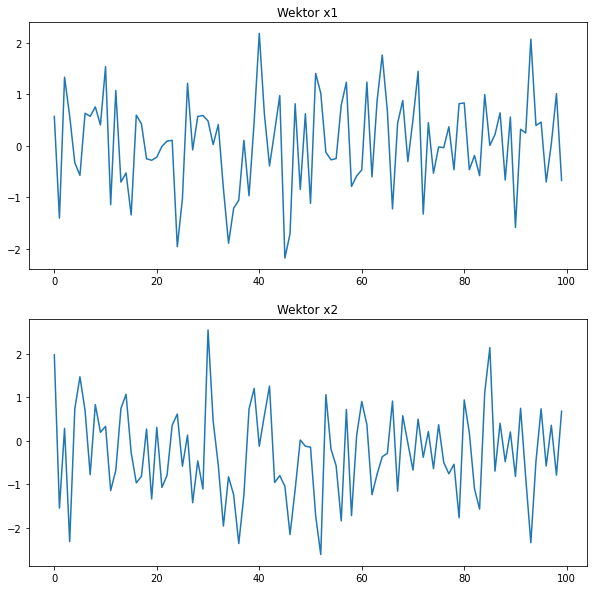

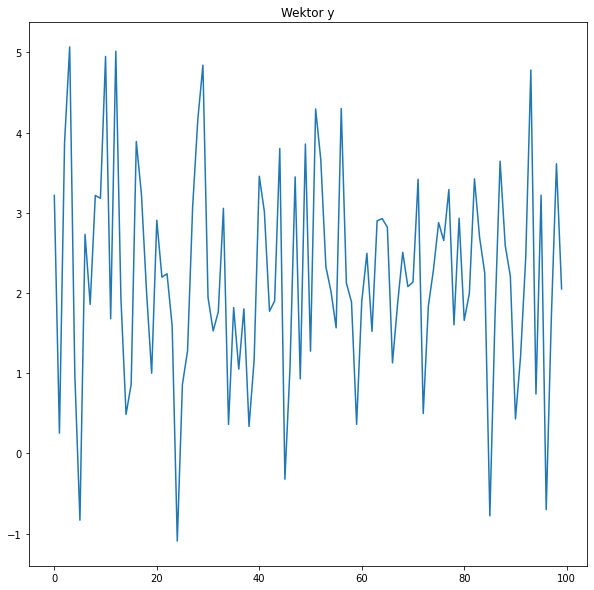

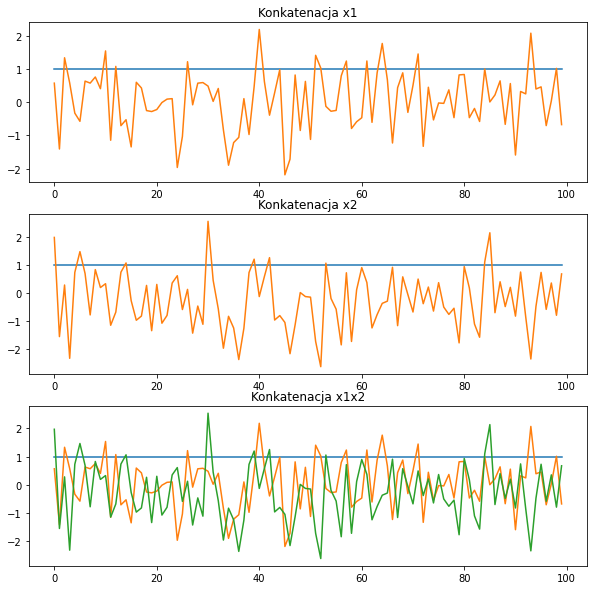

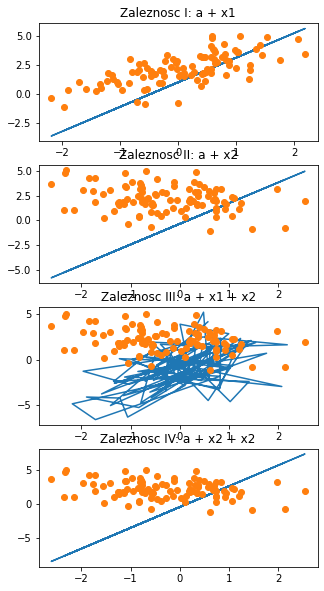

In [72]:
# Ad. 1
x1 = np.random.normal(0, 1, (100, 1))
x2 = np.random.normal(0, 1, (100, 1))
print("Wygenerowane wektory:\nx1:\n{}\nx2:\n{}\n".format(x1, x2))

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(x1)
plt.title('Wektor x1')
plt.subplot(2,1,2)
plt.plot(x2)
plt.title('Wektor x2')
# Ad. 2
epsilon = np.random.normal(0, 1, (100, 1))
print("Jako epsilon przyjmuje:\n{}\n".format(epsilon))

y = 2 + x1 - (0.5 * x2) + epsilon
print("Wartosc obliczonego wektora y:\n{}\n".format(y))

plt.figure(figsize=(10,10))
plt.plot(y)
plt.title('Wektor y')

# Ad. 3
vector_ones = np.ones((100,1))

conc_x1 = np.concatenate((vector_ones, x1), axis=1)
print("Konkatenacja x1:\n{}\n".format(conc_x1))

conc_x2 = np.concatenate((vector_ones, x2), axis=1)
print("Konkatenacja x2:\n{}\n".format(conc_x2))

conc_x1x2 = np.concatenate((vector_ones, x1,x2), axis=1)
print("Konkatenacja x1x2:\n{}\n".format(conc_x1x2))

plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
plt.plot(conc_x1)
plt.title('Konkatenacja x1')
plt.subplot(3,1,2)
plt.plot(conc_x2)
plt.title('Konkatenacja x2')
plt.subplot(3,1,3)
plt.plot(conc_x1x2)
plt.title('Konkatenacja x1x2')


# Ad. 4
Q_1, R_1 = np.linalg.qr(conc_x1)
result_1 = sp.linalg.solve_triangular(R_1, np.transpose(Q_1) @ y)

Q_2, R_2 = np.linalg.qr(conc_x2)
result_2 = sp.linalg.solve_triangular(R_2, np.transpose(Q_2) @ y)

Q_3, R_3 = np.linalg.qr(conc_x1x2)
result_3 = sp.linalg.solve_triangular(R_3, np.transpose(Q_3) @ y)


reg_1 = result_1[1] + (result_1[0] * x1)
reg_2 = result_2[1] + (result_2[0] * x2)
reg_3 = result_3[2] + (result_3[1] * x1) + (result_3[0] * x2)
reg_4 = result_3[2] + (result_3[1] * x2) + (result_3[0] * x2)

plt.figure(figsize=(5,10))
plt.subplot(4, 1, 1)
plt.plot(x1, reg_1, x1, y, 'o')
plt.title('Zaleznosc I: a + x1')

plt.subplot(4, 1, 2)
plt.plot(x2, reg_2, x2, y, 'o')
plt.title('Zaleznosc II: a + x2')

plt.subplot(4, 1, 3)
plt.plot(x1, reg_3, x2, y, 'o')
plt.title('Zaleznosc III: a + x1 + x2')

plt.subplot(4, 1, 4)
plt.plot(x2, reg_4, x2, y, 'o')
plt.title('Zaleznosc IV: a + x2 + x2')

pred1=[min(x1), max(x1)]
pred2=[min(x2), max(x2)]

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)